<a href="https://colab.research.google.com/github/Yuteng0927/Deep-learning-challenge/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import tensorflow as tf
import numpy as np

In [2]:
import tensorflow as tf

In [7]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [9]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Target variable: IS_SUCCESSFUL --> 1(successful) and 0(not successful)

Feature variables: Both classification and application types

In [10]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [11]:
# Determine the number of unique values in each column.
application_uni = application_df.dtypes.index.tolist()
application_df[application_uni].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
application_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_count[application_type_count < 700].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 70].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      499
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
Name: CLASSIFICATION, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_application_df = pd.get_dummies(application_df)
numeric_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
y = numeric_application_df["IS_SUCCESSFUL"]
X = numeric_application_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

## First try

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 14

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 357       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
y_test = np.array(y_test)
y_train = np.array(y_train)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5960 - accuracy: 0.7067
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5623 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5563 - accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7316
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7305
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5490 - accuracy: 0.7335
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accura

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5524 - accuracy: 0.7251 - 545ms/epoch - 2ms/step
Loss: 0.5524081587791443, Accuracy: 0.7251312136650085


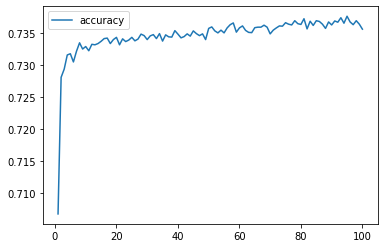

In [24]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [25]:
# Export our model to HDF5 file

nn.save('AlphabetSoupCharity1.h5')
# files.download('AlphabetSoupCharity1.h5')

## Second try

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 14
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 357       
                                                                 
 dense_4 (Dense)             (None, 14)                112       
                                                                 
 dense_5 (Dense)             (None, 27)                405       
                                                                 
 dense_6 (Dense)             (None, 1)                 28        
                                                                 
Total params: 902
Trainable params: 902
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
y_test = np.array(y_test)
y_train = np.array(y_train)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5929 - accuracy: 0.7009
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5596 - accuracy: 0.7287
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7295
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5523 - accuracy: 0.7298
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7326
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accura

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5513 - accuracy: 0.7244 - 517ms/epoch - 2ms/step
Loss: 0.5513030886650085, Accuracy: 0.7244315147399902


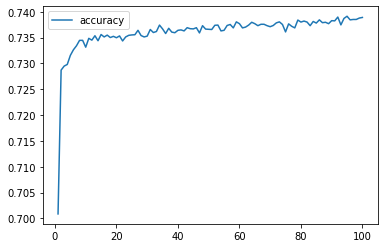

In [30]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [31]:
# Export our model to HDF5 file

nn.save('AlphabetSoupCharity2.h5')
# files.download('AlphabetSoupCharity1.h5')

## Third try

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 14
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 357       
                                                                 
 dense_8 (Dense)             (None, 14)                112       
                                                                 
 dense_9 (Dense)             (None, 27)                405       
                                                                 
 dense_10 (Dense)            (None, 1)                 28        
                                                                 
Total params: 902
Trainable params: 902
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
y_test = np.array(y_test)
y_train = np.array(y_train)
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 4s 3ms/step - loss: 0.5990 - accuracy: 0.6971
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7310
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7321
Epoch 4/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5539 - accuracy: 0.7337
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7321
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7335
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7328
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7331
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7339
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accura

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5530 - accuracy: 0.7282 - 503ms/epoch - 2ms/step
Loss: 0.553037703037262, Accuracy: 0.7281632423400879


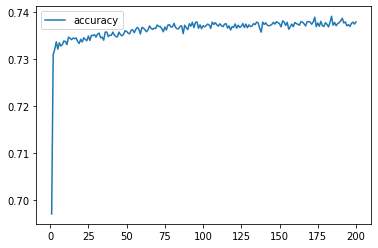

In [36]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [37]:
# Export our model to HDF5 file

nn.save('AlphabetSoupCharity3.h5')
# files.download('AlphabetSoupCharity1.h5')